In [1]:
#Import Libraries

import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
#Read DataFrame
df=pd.read_csv("Covid_in_India.csv")

#Edit df
df.Date=pd.to_datetime(df.Date, format="%d-%m-%Y")
df=df.sort_values(by=["Date"])
df["Conf"]=df.ConfFor+df.ConfInd

In [112]:
#DEFINE FUNCTIONS

# Latest data statewise
def status_now():
    """
    Displays the latest statewise confirmed cases bar graph
    """
    
    df_state=df[df.Date==df.Date.max()]
    df_state=df_state.sort_values(by=["Conf"], ascending=False)

    last=df.Date.max()
    d=str(last.day)
    m=str(last.month)
    y=str(last.year)
    date_t=d+"-"+m+"-"+y
    
    #Report Latest Stats
    print(f"Total Confirmed : {df_state.Conf.sum()}\n\tIndian Nationals: {df_state.ConfInd.sum()}\n\tForeign Nationals: {df_state.ConfFor.sum()}\
    \nRecovered : {df_state.Rec.sum()}\nDeaths : {df_state.Death.sum()}\
    \nMortality Rate:{round(df_state.Death.sum()*100/df_state.ConfInd.sum(),2)}")

    #Plot State Wise Confirmed Bargraph
    plt.figure(figsize=(10,8))
    sns.set(style="darkgrid")
    plt.title(f"Total confirmed cases as on {date_t}", fontsize=16)
    sns.barplot(x="State", y="Conf", data=df_state)
    plt.xticks(rotation=90)
    plt.show()
    
#Time Series Maker    
def ts_maker(region="All"):
    """
    Takes in State Name 
    Returns time series dataframe
    """
    if region=="All":
        df_temp=df
    else:
        df_temp=df[df.State==region]
    dates=df_temp.Date.unique()
    ConfTot=[]
    DeathTot=[]
    RecTot=[]
    MortRate=[]
    for date in dates:
        ConfTot.append(df_temp.Conf[df_temp.Date==date].sum())
        DeathTot.append(df_temp.Death[df_temp.Date==date].sum())
        RecTot.append(df_temp.Rec[df_temp.Date==date].sum())
        MortRate.append(round(df_temp.Death[df_temp.Date==date].sum()*100/df_temp.Conf[df_temp.Date==date].sum(),2))
    ts_dict={"Date":dates,"ConfTot":ConfTot,"DeathTot":DeathTot,"RecTot":RecTot,"MortRate":MortRate}
    ts=pd.DataFrame(ts_dict)
    return(ts)

#Time Series Plotter
def ts_plotter(region="All"):
    """
    Takes in Region Name
    Plots status
    """
    ts=ts_maker(region)
    
    plt.figure(figsize=(12,6))
    sns.set(style="darkgrid")
    plt.plot(ts.Date, ts.ConfTot, marker='s', c='k', label="Confirmed")
    plt.plot(ts.Date, ts.DeathTot, marker='s', c='r', label="Death")
    plt.plot(ts.Date, ts.RecTot, marker='s', c='g',label="Recovered")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(ts.Date, ts.MortRate, marker='s', c='k', label="Mortality Rate")
    plt.legend()
    plt.show()
    
def df_now():
    """
     Return the latest statewise data
    """
    
    df_state=df[df.Date==df.Date.max()]
    df_state=df_state.sort_values(by=["Conf"], ascending=False)
    df_state.reset_index(inplace=True)
    return df_state

Total Confirmed : 173
	Indian Nationals: 148
	Foreign Nationals: 25    
Recovered : 20
Deaths : 4    
Mortality Rate:2.7


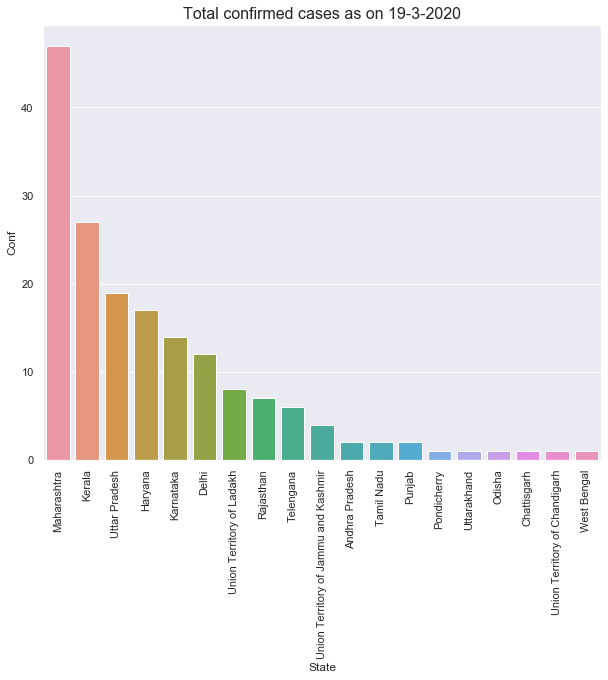

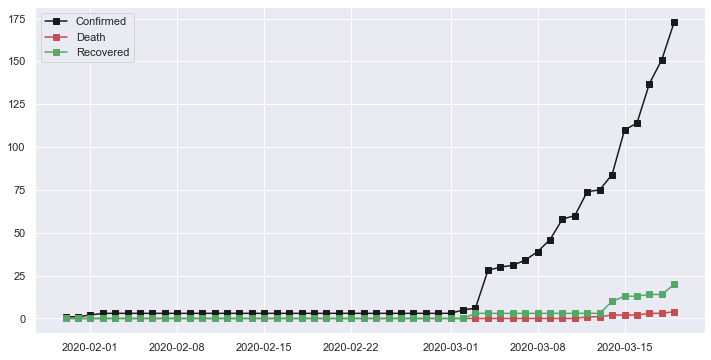

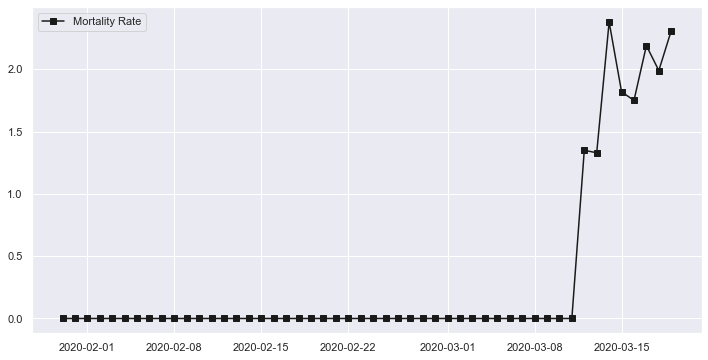

In [113]:
#Function Call
status_now()
ts_plotter()

C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ABCD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

Total Confirmed : 173
	Indian Nationals: 148
	Foreign Nationals: 25
Recovered : 20
Deaths : 4
Mortality Rate:2.7


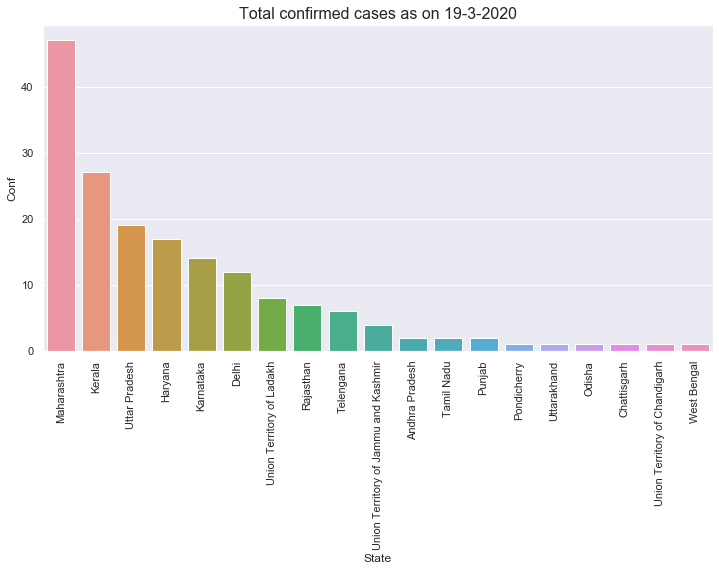

New States/Union Territories Affected :  2
Total New Cases reported in last 24 hours :  22
Total Recoverd cases reported in last 24 hours :  6
Total New Deaths reported in last 24 hours :  1


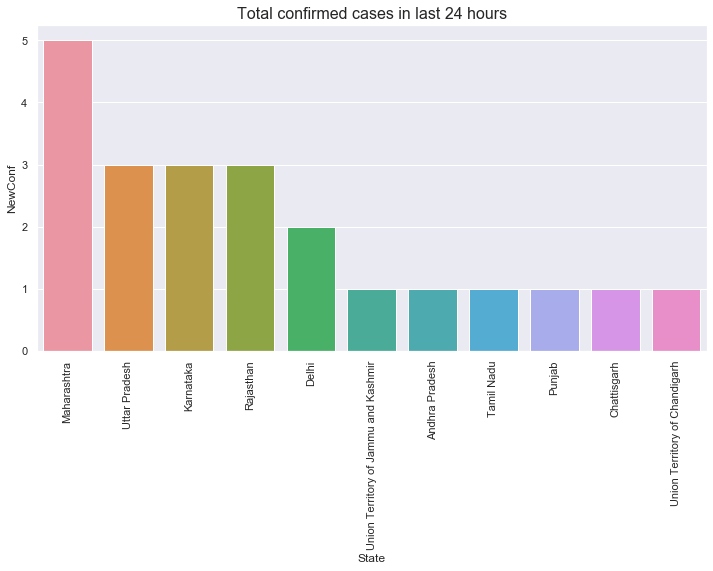

In [111]:
#Array of dates
dates=df.Date.unique()

#df_last: state wise data on last date 
df_last=df[df.Date==dates[-1]]
df_last.sort_values(by=["Conf"], ascending=False, inplace=True)
df_last.reset_index(inplace=True)

#last date as string
last=df_last.Date[0]
d=str(last.day)
m=str(last.month)
y=str(last.year)
date_t=d+"-"+m+"-"+y
    
#df_pen: state wise data on penultimate date
df_pen=df[df.Date==dates[-2]]

#New Cases Append
df_last['NewConf']=df_last.Conf
df_last['NewRec']=df_last.Rec
df_last['NewDeath']=df_last.Death
for state in df_pen.State.unique():
    df_last.NewConf[df_last.State==state]=df_last.Conf[df_last.State==state].sum()-df_pen.Conf[df_pen.State==state].sum()
    df_last.NewRec[df_last.State==state]=df_last.Rec[df_last.State==state].sum()-df_pen.Rec[df_pen.State==state].sum()
    df_last.NewDeath[df_last.State==state]=df_last.Death[df_last.State==state].sum()-df_pen.Death[df_pen.State==state].sum()
    
    
    
#Report Latest Stats
print(f"Total Confirmed : {df_last.Conf.sum()}\n\tIndian Nationals: {df_last.ConfInd.sum()}\n\tForeign Nationals: {df_last.ConfFor.sum()}\
\nRecovered : {df_last.Rec.sum()}\nDeaths : {df_last.Death.sum()}\
\nMortality Rate:{round(df_last.Death.sum()*100/df_last.ConfInd.sum(),2)}")    

#Plot State Wise Confirmed Bargraph
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
plt.title(f"Total confirmed cases as on {date_t}", fontsize=16)
sns.barplot(x="State", y="Conf", data=df_last)
plt.xticks(rotation=90)
plt.show() 

#new states affected
st_new=len(df_last.State.unique())-len(df_pen.State.unique())
print("New States/Union Territories Affected : ",st_new)
print("Total New Cases reported in last 24 hours : ", df_last.NewConf.sum())
print("Total Recoverd cases reported in last 24 hours : ", df_last.NewRec.sum())
print("Total New Deaths reported in last 24 hours : ", df_last.NewDeath.sum())    
    
#New Cases Reported 
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
plt.title(f"Total confirmed cases in last 24 hours", fontsize=16)
sns.barplot(x="State", y="NewConf",
            data=df_last[df_last.NewConf>0].sort_values(by=['NewConf'], ascending=False))
plt.xticks(rotation=90)
plt.show() 

#Mapping of data
lat_ind=20.5937
lon_ind=78.9629

ind_map = folium.Map(location=[lat_ind, lon_ind], tiles='cartodbpositron',
           min_zoom=4, max_zoom=6, zoom_start=4)

for i in range(df_last.shape[0]):
    folium.CircleMarker([df_last.Latitude[i], df_last.Longitude[i]], 
                    radius=3+(15*df_latest.Conf[i]/df_latest.Conf.max()),
                    color='None',
                    fill_color='red',fill_opacity=0.4,
                    tooltip=f"Region : {df_last.State[i]}<br>Confirmed Cases : {df_last.Conf[i]}"
                   ).add_to(ind_map)
    


ind_map.save("ind_map.html")
display(ind_map)
#df_last

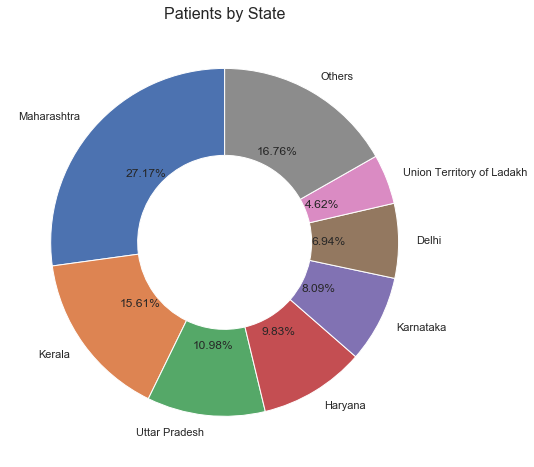

In [107]:

#Pie-Chart showing State Wise Distribution of confirmed patients
top_states=[]
top_conf=[]
top_states.extend(df_last.head(7).State.unique())
top_states.append("Others")

top_conf.extend(df_last.head(7).Conf.unique())
top_conf.append(df_last.Conf.sum()-df_last.head(7).Conf.sum())
top_conf[7]
explode=np.zeros(df_last.shape[0],)
explode=explode+0.1

plt.figure(figsize=(8,8))
plt.title("Patients by State", fontsize=16)
plt.pie(top_conf, labels=top_states, autopct='%1.2f%%',
       wedgeprops=dict(width=0.5), startangle=90)
plt.show()

In [109]:
df_last


,index,ConfFor,ConfInd,Date,Death,Latitude,Longitude,Rec,State,Conf,NewConf,NewRec,NewDeath
0,215,3,44,2020-03-19,1,19.7515,75.7139,0,Maharashtra,47,5,0,0
1,214,2,25,2020-03-19,0,10.8505,76.2711,3,Kerala,27,0,0,0
2,225,1,18,2020-03-19,0,26.8467,80.9462,9,Uttar Pradesh,19,3,4,0
3,212,14,3,2020-03-19,0,29.0588,76.0856,0,Haryana,17,0,0,0
4,213,0,14,2020-03-19,1,15.3173,75.7139,0,Karnataka,14,3,0,0
5,211,1,11,2020-03-19,1,28.7041,77.1025,3,Delhi,12,2,1,0
6,224,0,8,2020-03-19,0,34.2996,78.2932,0,Union Territory of Ladakh,8,0,0,0
7,219,2,5,2020-03-19,0,27.0238,74.2179,3,Rajasthan,7,3,0,0
8,221,2,4,2020-03-19,0,18.1124,79.0193,1,Telengana,6,0,0,0
9,223,0,4,2020-03-19,0,33.7782,76.5762,0,Union Territory of Jammu and Kashmir,4,1,0,0
